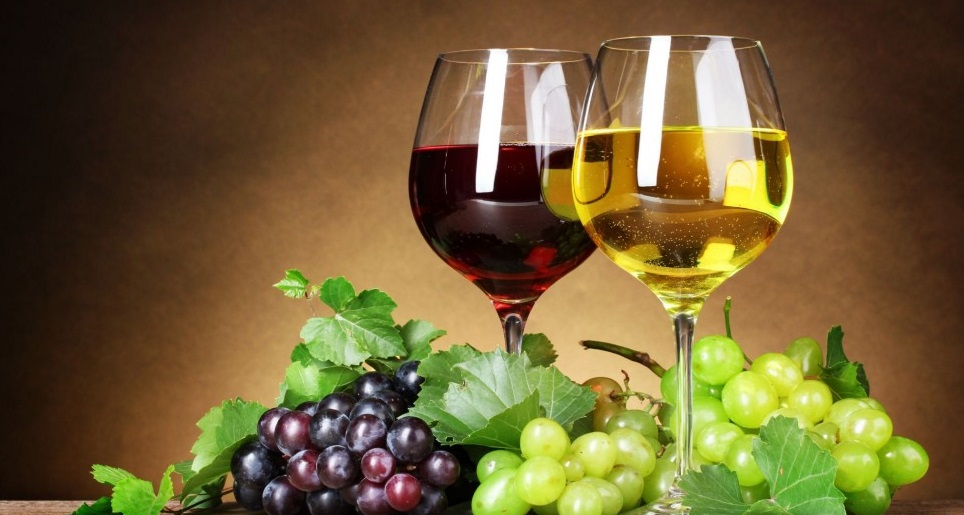

<a name="índice"></a>
# Índice
[Extra Trees Classifier](#etc)<br>
[Multi-layer Perceptron (MLP)](#rna)

# BUSINESS UNDERSTANDING

In [290]:
# Case de dados para CLASSIFICAÇÃO
# Identificar o tipo de vinho de acordo com as características de vinho tinto e branco presente na base de dados

# DATA UNDERSTANDING

In [291]:
# IA -> MACHINE LEARNING
# MODELO SUPERVISIONADO -> MÉTODO CLASSIFICAÇÃO
# Dados disponibilizadas no kaggle para efeito de estudo sobre o tipo de vinho com base nas características
# Obs1: Verificar se todos os atributos são importantes para o modelo

[Wine dataset](https://www.kaggle.com/datasets/dell4010/wine-dataset)

# Title

In [292]:
# Classificação de binhos tinto e branco

# Head

In [293]:
# estudando machine learning
# by geanclm em 20/02/2022 at 11:47h
# update by geanclm on 24/10/2023

# Local files

In [294]:
!dir

 O volume na unidade C ‚ Windows
 O N£mero de S‚rie do Volume ‚ 9241-82D4

 Pasta de C:\Users\geanc\OneDrive\Documentos\GitHub\machine-learning

15/12/2023  11:12    <DIR>          .
29/11/2023  09:13    <DIR>          ..
24/10/2023  09:36                68 .gitattributes
29/11/2023  09:27    <DIR>          .ipynb_checkpoints
15/12/2023  11:12         1.171.544 CLASSIFICA€ÇO_Wine_Kaggle_csv.ipynb
24/10/2023  09:36             1.091 LICENSE
24/10/2023  09:36                50 README.md
01/11/2023  13:01           131.951 Vinho-Tinto-e-Vinho-Branco.jpg
07/11/2023  16:35         9.618.537 wine_classifier_etc_2023-11-07.joblib
24/10/2023  09:36           384.016 wine_dataset.csv
               7 arquivo(s)     11.307.257 bytes
               3 pasta(s)   851.098.005.504 bytes dispon¡veis


# Library installation

In [295]:
# !pip install -U imbalanced-learn
# !pip install imblearn
# !pip install pyod
# !pip install tensorflow

# Import libs

In [296]:
# para verificar dados relativos a versão utilizada
import sys
import sklearn

# função utilizada para registrar data e hora no nome do modelo salvo
from datetime import datetime

# principais bibliotecas para lidar com dados
import pandas as pd
import numpy as np

# gerar gráficos
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import plot_tree # Gráfico da Árvore

# função para gerar o MODELO de machine learning
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# trabalhar com os dados com rede neural
from sklearn.neural_network import MLPClassifier
import tensorflow as tf

# Validação cruzada
from sklearn.model_selection import GridSearchCV

# função para MÉTRICA de validação do modelo
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc

# função para VALIDAÇÃO do modelo
from sklearn.model_selection import train_test_split as tts

# balancemaneto dos dados em relação ao MAIOR valor de y
# from imblearn import under_sampling, over_sampling # verificar se realmente é necessária essa linha - reduntante!!!
from imblearn.over_sampling import SMOTE

# balancemaneto dos dados em relação ao MENOR valor de y
from imblearn.under_sampling import RandomUnderSampler

# Padronizar os dados
from sklearn.preprocessing import StandardScaler

# Normalizar os dados
from sklearn.preprocessing import MinMaxScaler

# biblioteca para persistir o modelo
import joblib

# identificar outliers
from pyod.models.knn import KNN

# Configuração da Validação Cruzada
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
# from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RepeatedStratifiedKFold

# Combinação dos modelos
from sklearn.ensemble import VotingClassifier

In [297]:
print(sys.version)

3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]


In [298]:
print(sklearn.__version__)

1.3.0


# Load data

In [299]:
df = pd.read_csv(r'C:\Users\geanc\OneDrive\Documentos\GitHub\machine-learning\wine_dataset.csv')

# Exploratory Analysis

In [300]:
df.sample(15).T

1831     5592    2700    3654     992      1382  \
fixed_acidity            8.2      6.7     6.3     7.3      6.5      8.0   
volatile_acidity        0.27     0.28    0.17    0.29      0.4      0.6   
citric_acid             0.39     0.34    0.42    0.29      0.1     0.22   
residual_sugar           7.8      8.9     2.8     4.6      2.0      2.1   
chlorides              0.039    0.048   0.028   0.029    0.076     0.08   
free_sulfur_dioxide     49.0     32.0    45.0    27.0     30.0     25.0   
total_sulfur_dioxide   208.0    111.0   107.0   155.0     47.0    105.0   
density               0.9976  0.99455  0.9908  0.9931  0.99554  0.99613   
pH                      3.31     3.25    3.27    3.07     3.36      3.3   
sulphates               0.51     0.54    0.43    0.26     0.48     0.49   
alcohol                  9.5     11.0    11.8    10.6      9.4      9.9   
quality                    6        7       6       6        6        5   
style                  white    white   white   white      red      red   

                        2723     4819     3909    904     2203   492   \
fixed_acidity            9.6      9.0      6.8     6.8     6.3    8.9   
volatile_acidity        0.23     0.38     0.21    0.59    0.26    0.4   
citric_acid              0.4     0.53     0.55    0.06    0.49   0.51   
residual_sugar           1.5      2.1     14.6     6.0     1.5    2.6   
chlorides              0.044    0.102    0.053    0.06   0.052  0.052   
free_sulfur_dioxide     19.0     19.0     34.0    11.0    34.0   13.0   
total_sulfur_dioxide   135.0     76.0    159.0    18.0   134.0   27.0   
density               0.9937  0.99001  0.99805  0.9962  0.9924  0.995   
pH                      2.96     2.93     2.93    3.41    2.99   3.32   
sulphates               0.49     0.57     0.44    0.59    0.61    0.9   
alcohol                 10.9     12.9      9.2    10.8     9.8   13.4   
quality                    5        5        5       7       6      7   
style                  white    white    white     red   white    red   

                         4999     5712     6249  
fixed_acidity             7.7      6.1      5.6  
volatile_acidity         0.46     0.17    0.695  
citric_acid              0.18     0.29     0.06  
residual_sugar            3.3      1.1      6.8  
chlorides               0.054    0.041    0.042  
free_sulfur_dioxide      18.0     32.0      9.0  
total_sulfur_dioxide    143.0     92.0     84.0  
density               0.99392  0.99036  0.99432  
pH                       3.12     3.26     3.44  
sulphates                0.51     0.57     0.44  
alcohol                  10.8     11.2     10.2  
quality                     6        6        5  
style                   white    white    white

In [301]:
# filtrar dado específico do data frame
df.loc[0:4,'style']

0    red
1    red
2    red
3    red
4    red
Name: style, dtype: object

In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  style                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [303]:
df.dtypes[df.dtypes.values == 'object'].index

Index(['style'], dtype='object')

In [304]:
df.shape

(6497, 13)

In [305]:
df.describe().T

count        mean        std      min       25%  \
fixed_acidity         6497.0    7.215307   1.296434  3.80000   6.40000   
volatile_acidity      6497.0    0.339666   0.164636  0.08000   0.23000   
citric_acid           6497.0    0.318633   0.145318  0.00000   0.25000   
residual_sugar        6497.0    5.443235   4.757804  0.60000   1.80000   
chlorides             6497.0    0.056034   0.035034  0.00900   0.03800   
free_sulfur_dioxide   6497.0   30.525319  17.749400  1.00000  17.00000   
total_sulfur_dioxide  6497.0  115.744574  56.521855  6.00000  77.00000   
density               6497.0    0.994697   0.002999  0.98711   0.99234   
pH                    6497.0    3.218501   0.160787  2.72000   3.11000   
sulphates             6497.0    0.531268   0.148806  0.22000   0.43000   
alcohol               6497.0   10.491801   1.192712  8.00000   9.50000   
quality               6497.0    5.818378   0.873255  3.00000   5.00000   

                            50%        75%        max  
fixed_acidity           7.00000    7.70000   15.90000  
volatile_acidity        0.29000    0.40000    1.58000  
citric_acid             0.31000    0.39000    1.66000  
residual_sugar          3.00000    8.10000   65.80000  
chlorides               0.04700    0.06500    0.61100  
free_sulfur_dioxide    29.00000   41.00000  289.00000  
total_sulfur_dioxide  118.00000  156.00000  440.00000  
density                 0.99489    0.99699    1.03898  
pH                      3.21000    3.32000    4.01000  
sulphates               0.51000    0.60000    2.00000  
alcohol                10.30000   11.30000   14.90000  
quality                 6.00000    6.00000    9.00000

In [306]:
# verificar a existência de dados nulos
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
style                   0
dtype: int64

In [307]:
# Em caso de haver dados nulos analisar melhor estratégia para a situação pontual

<center style="font-size:18pt; background-color:#0f79b6">
    <br/>
        <b style="color: #ffffff">
            DATA PREPARATION
        </b>
    <br/>&nbsp;
</center>

In [308]:
df['style'] = df['style'].replace('red', 0) # vinho tinto
df['style'] = df['style'].replace('white', 1) # vinho branco

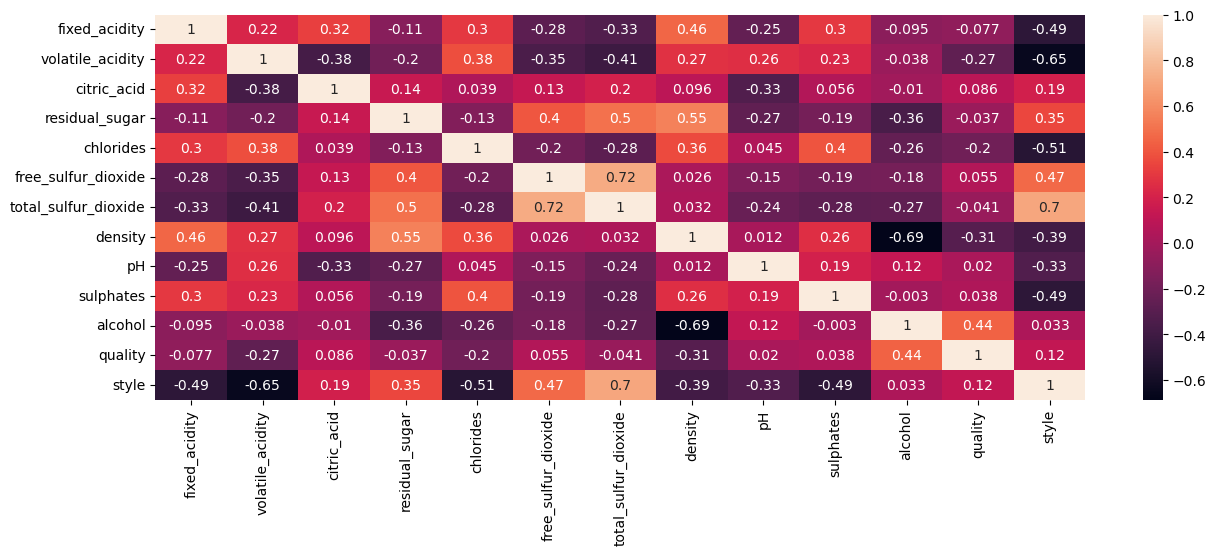

In [309]:
# Analisar a correlação entre as variáveis da base de dados
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True);

In [310]:
# 1 - VERIFICAR NECESSIDADE DE APLICAR O GET DUMMIES para cada base de dados
# df_d = pd.get_dummies(df)
# df_d.sample(5)

# DATA VISUALIZATION

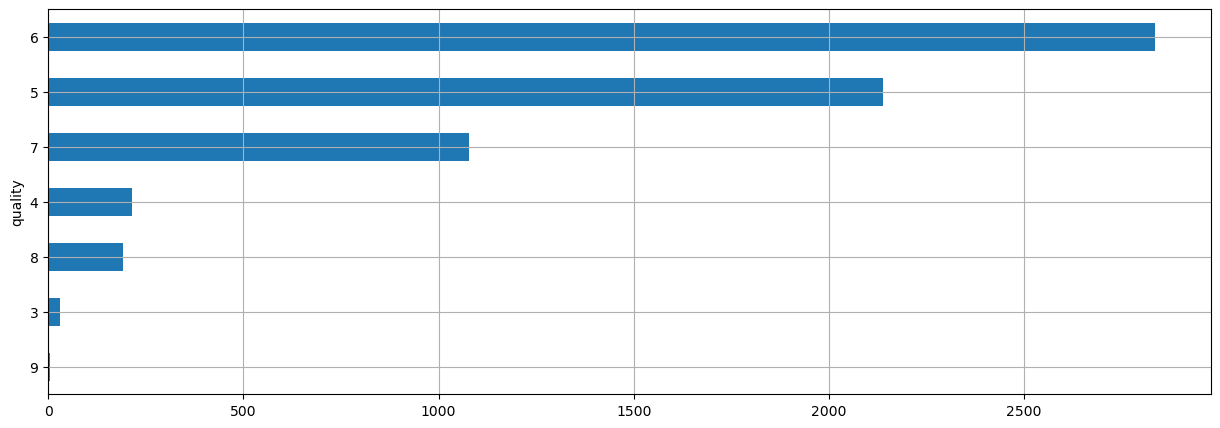

In [311]:
# wine ranking
plt.figure(figsize=(15,5))
df['quality'].value_counts(ascending=True).plot.barh()
plt.grid()
plt.show();

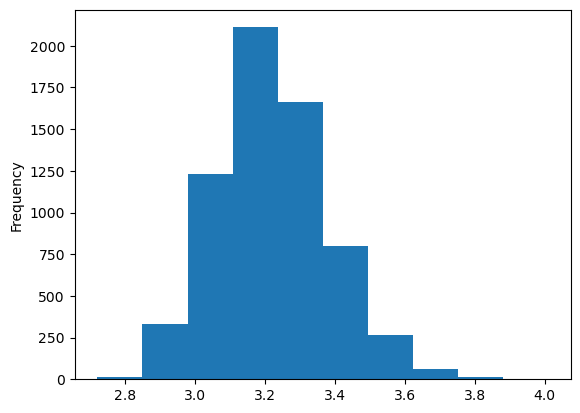

In [312]:
# frequência geral de pH dos vinhos
df['pH'].plot.hist();

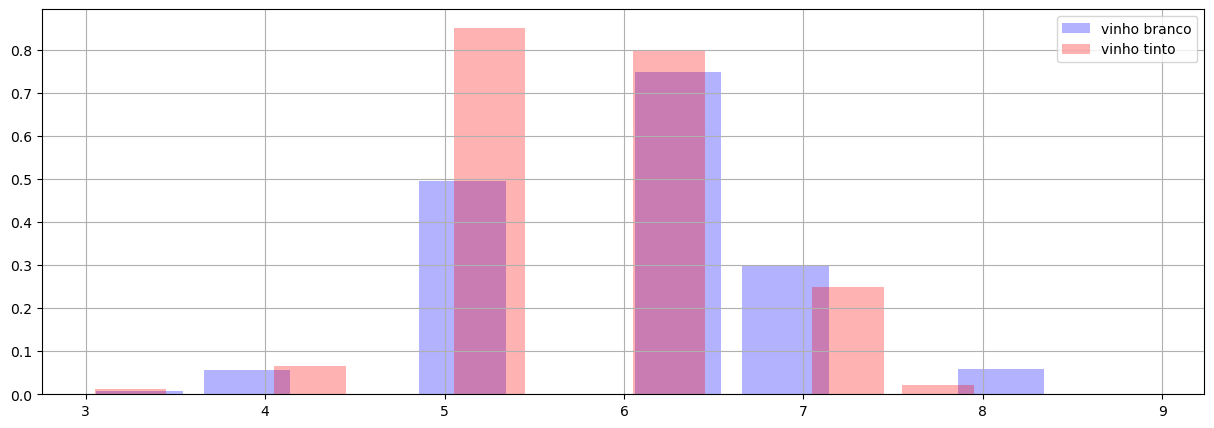

In [313]:
# ANALISANDO a qualidade geral dos vinhos em relação a característica tinto e branco
# (df.loc[df['style']== 1]).hist(figsize=(15,5));
# df['quality'].hist()

# min = df['quality'].min()
# max = df['quality'].max()
# bins = np.linspace(min,max, 6)

plt.figure(figsize=(15,5))
(df['quality'].loc[df['style']== 1]).hist(rwidth=0.80, color='b', alpha=.3, density=True, label='vinho branco') # vinhos branco
(df['quality'].loc[df['style']== 0]).hist(rwidth=0.80, color='r', alpha=.3, density=True, label='vinho tinto') # vinhos tinto;
plt.legend();

# Análise dos outliers (df)

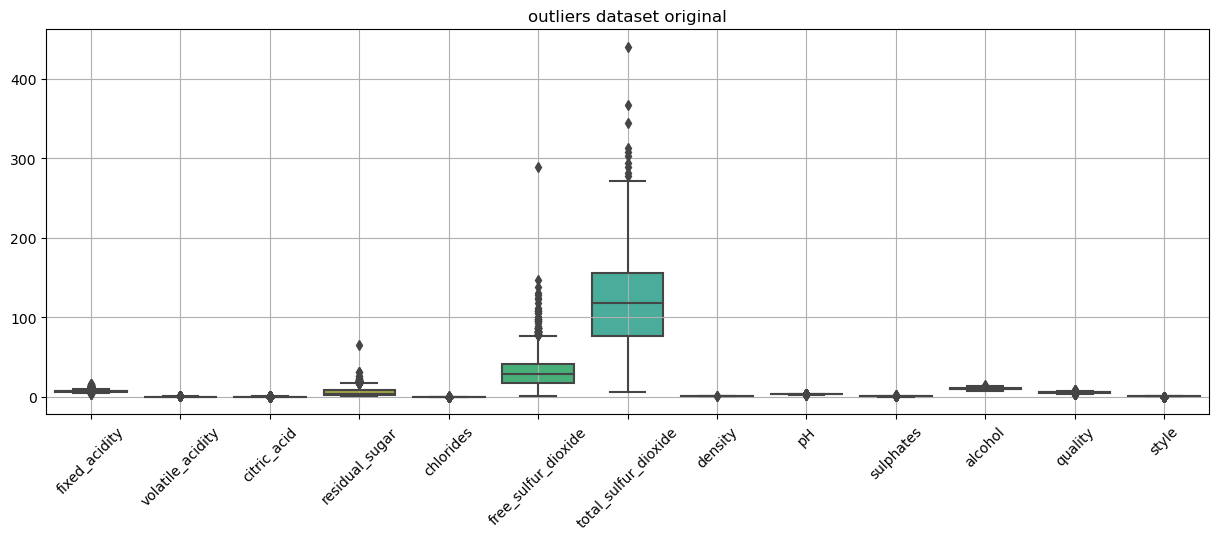

In [314]:
# Outliers data frame df
plt.figure(figsize=(15,5))
ax = sns.boxplot(data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('outliers dataset original')
plt.grid()
plt.show();

In [315]:
# LIMITE INFERIOR E SUPERIOR DO BOX PLOT DE VARIÁVEL ESPECÍFICA
var = 'total_sulfur_dioxide'
q1 = df[var].quantile(0.25)
q2 = df[var].quantile(0.5)
q3 = df[var].quantile(0.75)
amplitude = q3 - q1
limite_inferior = q1 - (1.5 * amplitude)
limite_superior = q3 + (1.5 * amplitude)
menor_valor_serie = df[var].min()
maior_valor_serie = df[var].max()
quant_dados_ALS = df.loc[df[var] > limite_superior].count()[0] # quantidade de dados acima do limite superior
quant_dados_BLI = df.loc[df[var] < limite_inferior].count()[0] # quantidade de dados abaixo do limite inferior
perc_ALS = (((df.loc[df[var] > limite_superior]).count()[0] / df[var].count())) * 100
perc_BLI = (((df.loc[df[var] < limite_inferior]).count()[0] / df[var].count())) * 100
box_splot = {
        'perc_BLI':[perc_BLI],
        'quant_dados_BLS':[quant_dados_BLI],
        'menor_valor_serie':[menor_valor_serie],
        'LI_box_splot':[limite_inferior],
        'q1':[q1],
        'q2':[q2],
        'q3':[q3],
        'LS_box_splot':[limite_superior],
        'maior_valor_serie':[maior_valor_serie],
        'quant_dados_ALS':[quant_dados_ALS],
        'perc_ALS':[perc_ALS]        
}
df_box_splot = pd.DataFrame(box_splot)
df_box_splot

perc_BLI  quant_dados_BLS  menor_valor_serie  LI_box_splot    q1     q2  \
0       0.0                0                6.0         -41.5  77.0  118.0   

      q3  LS_box_splot  maior_valor_serie  quant_dados_ALS  perc_ALS  
0  156.0         274.5              440.0               10  0.153917

In [316]:
# Outliers var
plt.figure(figsize=(15,5))
ax = sns.boxplot(data=df[var])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title(var)
plt.text(0.4, limite_superior, f"Quant de dados acima do limite superior: {quant_dados_ALS}", ha='right',
         va='bottom', fontsize=10, color='red')
plt.text(0.4, limite_inferior, f"Quant de dados abaixo do limite inferior: {quant_dados_BLI}", ha='right',
         va='bottom', fontsize=10, color='blue')
plt.grid()
plt.show();

In [317]:
# Outliers acima do limite superior boxsplot var
df.loc[df[var] > limite_superior]

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
1079            7.9              0.30         0.68            8.30      0.050   
1081            7.9              0.30         0.68            8.30      0.050   
1924            7.5              0.27         0.31            5.80      0.057   
3016            8.6              0.55         0.35           15.55      0.057   
3530            7.1              0.49         0.22            2.00      0.047   
3726            9.1              0.33         0.38            1.70      0.062   
3977            9.4              0.23         0.56           16.45      0.063   
4253            6.9              0.40         0.22            5.95      0.081   
4751            7.6              0.25         1.23            4.60      0.035   
6344            6.1              0.26         0.25            2.90      0.047   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
1079                 37.5                 278.0  0.99316  3.01       0.51   
1081                 37.5                 289.0  0.99316  3.01       0.51   
1924                131.0                 313.0  0.99460  3.18       0.59   
3016                 35.5                 366.5  1.00010  3.04       0.63   
3530                146.5                 307.5  0.99240  3.24       0.37   
3726                 50.5                 344.0  0.99580  3.10       0.70   
3977                 52.5                 282.0  1.00098  3.10       0.51   
4253                 76.0                 303.0  0.99705  3.40       0.57   
4751                 51.0                 294.0  0.99018  3.03       0.43   
6344                289.0                 440.0  0.99314  3.44       0.64   

      alcohol  quality  style  
1079     12.3        7      0  
1081     12.3        7      0  
1924     10.5        5      1  
3016     11.0        3      1  
3530     11.0        3      1  
3726      9.5        5      1  
3977      9.3        5      1  
4253      9.4        5      1  
4751     13.1        6      1  
6344     10.5        3      1

In [318]:
# Instanciando o objeto KNN para detectar os outlers df
# Obs: uma das formas de tratar outliers mas que não é a mais adequada ou a certa, pois depende do contexto dos dados
detector = KNN()

# Treinar o detector de OUTLIERS
detector.fit(df)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [319]:
# 0 -> NÃO é outlier
# 1 -> outlier
previsoes = detector.labels_
previsoes

array([0, 0, 0, ..., 0, 0, 0])

In [320]:
# Fazendo uma contagem para identificar os outliers
np.unique(previsoes, return_counts = True)

(array([0, 1]), array([5847,  650], dtype=int64))

In [321]:
# Cálculo da distância realizado para identificação do outlier
confianca_previsoes = detector.decision_scores_
confianca_previsoes

array([2.12212299, 2.71635787, 2.18040046, ..., 2.34466423, 3.08154044,
       2.51754346])

In [322]:
# Lista outliers
outliers = []
for i in range(len(previsoes)):    
    if previsoes[i] == 1:
        outliers.append(i)

# Filtrar as linhas outlier df
df_outliers = df.iloc[outliers,:]

In [323]:
# salvar versão df sem os outliers
df_sem_outliers = df.loc[~df.index.isin(outliers)]

In [324]:
# df_sem_outliers

In [325]:
df.shape, df_sem_outliers.shape

((6497, 13), (5847, 13))

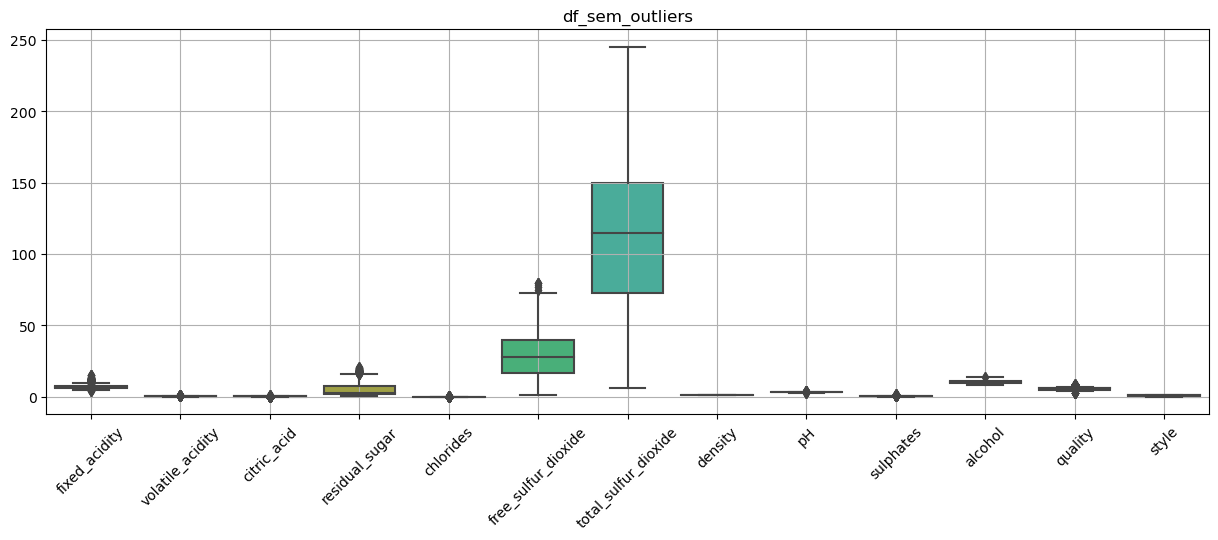

In [326]:
plt.figure(figsize=(15,5))
ax = sns.boxplot(data=df_sem_outliers)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('df_sem_outliers')
plt.grid()
plt.show();

In [327]:
# Análise variável após tratamento dos outliers
var = 'total_sulfur_dioxide'
plt.figure(figsize=(15,5))
ax = sns.boxplot(data=df_sem_outliers[var])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title(f'{var} - df_sem_outliers')
plt.text(0.4, limite_superior, f"limite superior", ha='right', va='bottom', fontsize=10, color='red')
plt.text(0.4, limite_inferior, f"limite inferior", ha='right', va='bottom', fontsize=10, color='blue')
plt.grid()
plt.show();

<center style="font-size:18pt; background-color:#0f79b6">
    <br/>
        <b style="color: #ffffff">
            MODELING
        </b>
    <br/>&nbsp;
</center>

In [328]:
# dividir em df MODEL para treinar e testar o modelo e df VALIDAÇÃO para fins de simulando o mundo real
df_model, df_validation = tts(df_sem_outliers, test_size=0.10)

In [329]:
# Divisão dos dados em X e y a partir do df_tr (corresponde a 70% da base utilizada para treinar o modelo)
X = df_model.drop('style', axis = 1)
y = df_model['style']
X.shape, y.shape

((5262, 12), (5262,))

In [330]:
# Variável de validação final para o modelo gerado (corresponde a 30% dos dados simulando mundo real)
X_val = df_validation.drop('style', axis = 1)
y_val = df_validation['style']

In [331]:
df.groupby('style').size()[0], df.groupby('style').size()[1]

(1599, 4898)

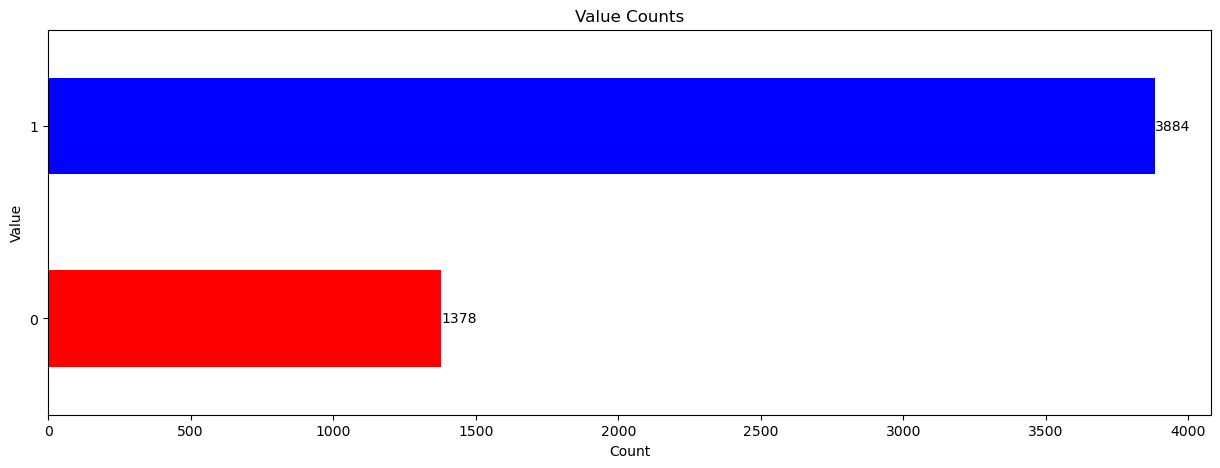

In [332]:
plt.figure(figsize=(15,5))
ax = y.value_counts(ascending=True).plot(kind ='barh', color = ['red','blue'])
ax.set_xlabel('Count')
ax.set_ylabel('Value')
ax.set_title('Value Counts')
ax.bar_label(ax.containers[0], label_type='edge');

In [333]:
# quantidade de 0 e 1 na variável y do df
np.unique(y, return_counts=True)

(array([0, 1], dtype=int64), array([1378, 3884], dtype=int64))

In [334]:
percentual_0 = np.bincount(y)[0] / len(y) * 100
percentual_1 = np.bincount(y)[1] / len(y) * 100
percentual_0, percentual_1

(26.187761307487644, 73.81223869251235)

# Data balancing

In [335]:
# OBSERVALÇÃO IMPORTANTE: CONFIRMAR EM QUE MOMENTO É O MAIS ADEQUADO PARA O BALANCEAMENTO DOS DADOS!
# OBSERVALÇÃO IMPORTANTE: CONFIRMAR EM QUE MOMENTO É O MAIS ADEQUADO PARA O BALANCEAMENTO DOS DADOS!
# OBSERVALÇÃO IMPORTANTE: CONFIRMAR EM QUE MOMENTO É O MAIS ADEQUADO PARA O BALANCEAMENTO DOS DADOS!

# balancemaneto dos dados com a geração de dados aleatórios na base minoritária de y
smote_ball = SMOTE()
X_bal, y_bal = smote_ball.fit_resample(X, y)

# balancemaneto dos dados com a remoção de dados da base majoritária de y
# rus = RandomUnderSampler()
# X_bal, y_bal = rus.fit_resample(X, y)

In [336]:
# y_bal.value_counts()

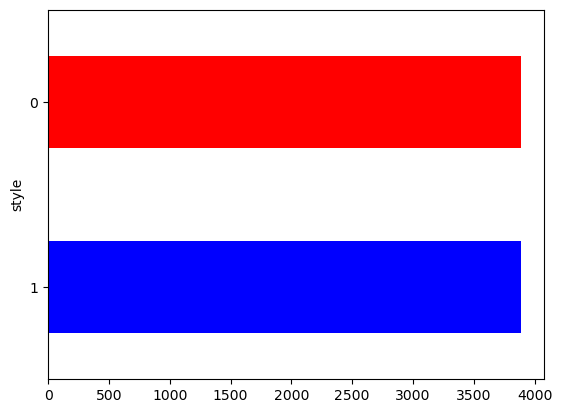

In [337]:
# variável y, balanceada, utilizada para TREINAR o modelo
y_bal.value_counts(ascending=True).plot(kind = 'barh', color = ['blue', 'red']);

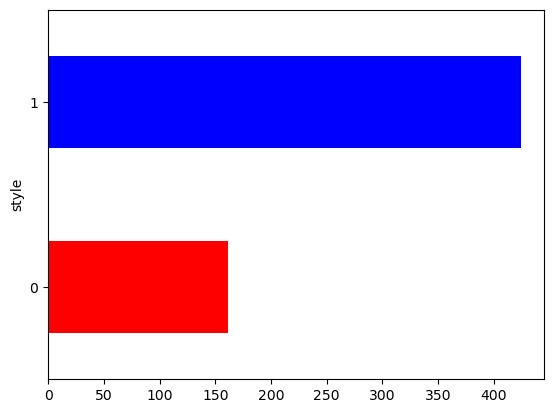

In [338]:
# Variável y, base de validação, utilizada para aplicar situações novas ao modelo já treinado e simulando vida real
y_val.value_counts(ascending=True).plot(kind = 'barh', color = ['red','blue']);

# Standardization

In [339]:
# Padronizar X_bal do X do df_tr
obj_padronizado = StandardScaler().fit(X_bal)
X_bal_padronizado = obj_padronizado.transform(X_bal)
X_bal_padronizado = pd.DataFrame(X_bal_padronizado)
X_bal_padronizado.columns = list(X_bal.columns)

In [340]:
X_bal_padronizado.tail()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
7763      -0.178159          0.171743    -0.228968       -0.493289   0.592711   
7764      -0.417868          1.868463    -0.977341       -0.586194   0.700802   
7765       0.231004          0.756866    -1.515948       -0.049701   0.518447   
7766      -0.385603          1.289151    -1.700359       -0.554031   0.034536   
7767      -0.377075          1.140269    -1.243371       -0.714689   0.114916   

      free_sulfur_dioxide  total_sulfur_dioxide   density        pH  \
7763             0.656190             -0.306792  0.498764  0.765268   
7764            -0.612800             -0.220788  0.380361  0.380802   
7765             0.163718             -0.506778  0.456703  0.697685   
7766            -1.086197             -1.149633  0.754602  1.409516   
7767             0.166058             -0.471247  0.274096  0.198762   

      sulphates   alcohol   quality  
7763  -0.152767 -0.775121 -0.832213  
7764   0.479911 -0.864456 -0.832213  
7765   0.613130  0.206130  0.366051  
7766   0.449687 -0.952959 -0.832213  
7767   0.232280 -1.118024 -0.832213

In [341]:
# df_padronizado.describe().T

In [342]:
# plt.figure(figsize=(15,5))
# ax = sns.boxplot(data=df_padronizado)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [343]:
# Padronizar X_val (origem no df_ts correspondente a 30% dos dados do df para teste do modelo)
obj_padronizado = StandardScaler().fit(X_val)
X_val_padronizado = obj_padronizado.transform(X_val)
X_val_padronizado = pd.DataFrame(X_val_padronizado)
X_val_padronizado.columns = list(X_val.columns)
X_val_padronizado.tail()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
580      -0.461726         -0.746139     0.266630        0.176039  -0.705389   
581      -0.752401         -0.260170     0.057263       -0.310648  -0.498843   
582       0.410299         -0.563901     0.127052        2.171455  -0.318116   
583       1.209655          1.683707    -0.919786       -0.213310   2.934980   
584       0.119624         -0.199424     2.918619        1.441425  -0.447207   

     free_sulfur_dioxide  total_sulfur_dioxide   density        pH  sulphates  \
580             0.067034             -0.067483 -0.814827 -0.154608  -0.420825   
581             0.504836              0.871118 -1.556537 -0.276174  -1.067992   
582             2.318590              1.415507  1.793011 -0.033041   1.391244   
583             1.380442              0.739714  1.400142 -0.336957   2.556145   
584             1.380442              0.720942  1.095330 -1.248706  -0.679692   

      alcohol   quality  
580  1.111511  0.138276  
581  1.644586  0.138276  
582 -1.465021 -1.069062  
583 -1.198483 -1.069062  
584 -1.642713 -1.069062

# Normalization

In [344]:
# obj_normalizado = MinMaxScaler().fit(X_bal)
# df_normalizado = obj_normalizado.transform(X_bal)
# df_normalizado = pd.DataFrame(df_normalizado)
# df_normalizado.columns = list(X_bal.columns)
# df_normalizado.head()

In [345]:
# df_normalizado.describe().T

In [346]:
# plt.figure(figsize=(15,5))
# ax = sns.boxplot(data=df_normalizado)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [347]:
# Analisar os outliers
plt.figure(figsize=(15,5))
ax = sns.boxplot(data=X_bal_padronizado)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show();

# VALIDAÇÃO HOLDOUT
# Separar df_model - balanceado e padronizado - em X_tr, X_ts, y_tr, y_ts

In [348]:
# Separar df_model - balanceado e padronizado - em X_tr, X_ts, y_tr, y_ts
PREDICTOR = X_bal_padronizado
TARGET = y_bal
X_tr, X_ts, y_tr, y_ts = tts(PREDICTOR,TARGET, test_size= 0.3)

In [349]:
X_tr.shape, X_ts.shape, y_tr.shape, y_ts.shape, y_tr.value_counts()[0], y_tr.value_counts()[1]

((5437, 12), (2331, 12), (5437,), (2331,), 2705, 2732)

<a name="etc"></a>
<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            Extra Trees Classifier
        </b>
    <br/>&nbsp;
</center>

<div style="overflow: auto;">
    <div style="float: left;">
        <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html">
            Consultar documentação "ExtraTreesClassifier"
        </a>
    </div>
    <div style="float: right;">
        <a href="#índice">
            Índice deste notebook
        </a>
    </div>
</div>

In [350]:
# Treinar o modelo
# etc = ExtraTreesClassifier(n_estimators=500, max_depth=10, n_jobs=-1)
# etc.fit(X_tr, y_tr)
# etc_y_pred = etc.predict(X_ts)

In [351]:
# Treinar o modelo
params = {    
    'n_estimators': np.arange(250, 750, 250),
    'max_depth': np.arange(5, 15, 5),
    'n_jobs': np.array([-1])
}
etc = GridSearchCV(
    ExtraTreesClassifier(),
    params,                                    
    cv=10,                                     
    scoring='roc_auc',
#     verbose=5,
)
etc.fit(X_tr, y_tr)

GridSearchCV(cv=10, estimator=ExtraTreesClassifier(),
             param_grid={'max_depth': array([ 5, 10]),
                         'n_estimators': array([250, 500]),
                         'n_jobs': array([-1])},
             scoring='roc_auc')

In [352]:
etc.best_params_, etc.best_score_, etc.best_estimator_, etc.best_index_

({'max_depth': 10, 'n_estimators': 500, 'n_jobs': -1},
 0.9985521552215604,
 ExtraTreesClassifier(max_depth=10, n_estimators=500, n_jobs=-1),
 3)

In [353]:
etc_y_pred = etc.predict(X_ts)

In [354]:
# PROPENSÃO respectiva, nas colunas, da variável resposta ser 0 e 1
etc.predict_proba(X_ts)

array([[0.01308462, 0.98691538],
       [0.17135369, 0.82864631],
       [0.99037464, 0.00962536],
       ...,
       [0.82840051, 0.17159949],
       [0.986416  , 0.013584  ],
       [0.95229504, 0.04770496]])

In [355]:
# Data frame PROPENSÃO respectiva, nas colunas, da variável resposta ser 0 e 1
pd.DataFrame(etc.predict_proba(X_ts), columns=['Propensão 0', 'Propensão 1']).head()

Propensão 0  Propensão 1
0     0.013085     0.986915
1     0.171354     0.828646
2     0.990375     0.009625
3     0.034389     0.965611
4     0.988874     0.011126

# EVALUATION

In [356]:
# Max e Min
etc_y_pred.min(), etc_y_pred.max()

(0, 1)

In [357]:
# Curva ROC
roc_auc_score(y_ts, etc_y_pred)

0.9957491783290925

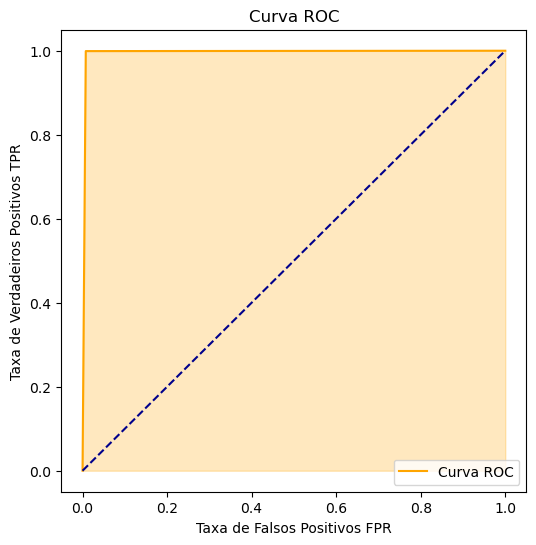

AUC: 1.00


In [358]:
# Calculando a curva ROC
# A curva ROC é um gráfico que representa a taxa de verdadeiros positivos (TPR)
# em função da taxa de falsos positivos (FPR) para diferentes valores de limiar de classificação.

fpr, tpr, thresholds = roc_curve(y_ts, etc_y_pred)

# Plotando a curva ROC
color = 'orange'
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color=color, label='Curva ROC')
plt.fill_between(fpr, tpr, color=color, alpha=.25)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos FPR')
plt.ylabel('Taxa de Verdadeiros Positivos TPR')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Calculando a área sob a curva (AUC)
# A área sob a curva ROC (AUC-ROC) é uma métrica resumida que quantifica o desempenho global do modelo.
# Um valor de AUC-ROC próximo a 1 indica um bom modelo, enquanto um valor próximo a 0,5 indica um desempenho aleatório.
roc_auc = auc(fpr, tpr)
print(f'AUC: {roc_auc:.2f}')

In [359]:
# SCORE
etc_acuracia = etc.score(X_ts, y_ts)
print("score AUTO:", etc_acuracia)

score AUTO: 0.999505230421261


In [360]:
# ACURÁCIA
etc_acuracia = accuracy_score(y_ts, etc_y_pred)
print("accuracy_score AUTO:", etc_acuracia)

accuracy_score AUTO: 0.9957099957099957


In [361]:
# média dos acertos do modelo em relação aos valores corretos da base de dados
np.mean(y_ts == etc_y_pred)

0.9957099957099957

In [362]:
# RECALL (SENSIBILIDADE)
# A revocação (sensibilidade ou recall) é uma métrica que indica, das amostras positivas existentes,
# quantas o modelo conseguiu classificar corretamente.
etc_recall = recall_score(y_ts, etc_y_pred)
print("etc_recall:", etc_recall)

etc_recall: 0.9991319444444444


In [363]:
# PRECISION
# A precisão é uma métrica que indica, das classificações positivas do modelo, quantas foram acertadas
etc_precision = precision_score(y_ts, etc_y_pred)
print("precision_score:", etc_precision)

precision_score: 0.9922413793103448


In [364]:
# MATRIZ CONFUSÃO
etc_confusion_matrix = confusion_matrix(y_ts, etc_y_pred)
etc_confusion_matrix

array([[1170,    9],
       [   1, 1151]], dtype=int64)

|                     |  PRED = 0          |           PRED = 1   |
|-                    |--------------------|----------------------|
| *REAL = 0*          |      VN            |             FP       |
| *REAL = 1*          |      FN            |             VP       |

In [365]:
# CÁLCULO MANUAL DA ACURÁCIA
# com base nos valores da matriz confusão
etc_acuracia_manual = (etc_confusion_matrix[0][0] + etc_confusion_matrix[1][1])/(etc_confusion_matrix[0][0] + etc_confusion_matrix[0][1] + etc_confusion_matrix[1][0] + etc_confusion_matrix[1][1])
print(f'Acurácia MANUAL:, {etc_acuracia_manual}')

Acurácia MANUAL:, 0.9957099957099957


In [366]:
# print(classification_report(y_ts, etc_y_pred))

In [367]:
etc_f1_score = f1_score(y_ts, etc_y_pred)
etc_f1_score

0.995674740484429

In [368]:
# X_ts[400:410].T
X_val_padronizado[400:410].T

400       401       402       403       404  \
fixed_acidity         1.136987  0.482968 -1.043076  0.192293 -0.825070   
volatile_acidity      1.622961 -0.017185  0.225799 -1.049870 -0.867632   
citric_acid          -0.152105  0.824944 -0.431261  0.127052  0.545787   
residual_sugar       -0.480988  0.419383 -0.894672 -0.821669 -0.699997   
chlorides             0.817886 -0.757025  0.043339 -0.550480 -0.731207   
free_sulfur_dioxide  -0.746029  1.130269 -0.558399 -0.996202  0.192120   
total_sulfur_dioxide -1.175032  0.326729  0.589538 -0.123799  0.551994   
density               1.061462 -1.092545 -0.594685 -0.902884 -1.038356   
pH                    0.210092 -1.613405  0.270875 -1.066356  0.210092   
sulphates            -0.161958 -1.067992 -0.679692  1.326527  1.197094   
alcohol              -1.109638  1.733432 -0.754254  0.400743  1.022665   
quality              -2.276400  0.138276  0.138276 -1.069062 -1.069062   

                           405       406       407       408       409  
fixed_acidity        -1.551757 -0.243720 -0.171051  0.046955  0.555637  
volatile_acidity     -0.260170 -0.563901  0.772515  2.108930 -0.381662  
citric_acid          -0.152105  0.057263 -1.757256 -0.012526  0.824944  
residual_sugar       -0.602660 -0.870337 -0.894672 -0.626994 -0.724331  
chlorides            -0.214843 -0.550480 -0.550480  0.327340  0.637158  
free_sulfur_dioxide   0.692466  0.379750 -0.746029  0.379750 -0.058053  
total_sulfur_dioxide  0.777258  0.927434  0.796030 -0.086255 -0.762048  
density              -1.702170 -1.234791 -1.173828  0.627951  0.184280  
pH                    0.392441 -1.248706 -1.248706  0.635574  0.817924  
sulphates            -0.485542  0.291059 -1.262142 -0.161958  0.808793  
alcohol               1.466894  0.667281 -0.043486 -0.931946  0.578435  
quality               0.138276  0.138276 -1.069062 -1.069062 -1.069062

# Testar o modelo com dados da base df_validation

In [369]:
# segmento da base y_ts que serve para validar o modelo
# selection_y_ts = list(y_ts[400:410].values)
start, end = 0, X_val_padronizado.shape[0]
validation = list(y_val[start:end].values)
# print (validation, end=' ')

In [370]:
len(validation)

585

In [371]:
# aplicação do modelo para predizer resultados com base na base treino e modelo gerado
prediction = list(etc.predict(X_val_padronizado[start:end]))
# prediction = list(etc.predict(X_ts[400:410]))
# print(prediction, end=' ')

In [372]:
len(prediction)

585

In [373]:
if (validation != prediction): 
    # imprimir dataframe com PREVISÃO diferente da variável real de referência
    resultados = []
    for i, (a, b) in enumerate(zip(validation, prediction)):
        if a != b:
    #         print(f"Posição {i}: {a} != {b}")
            resultados.append([i, a, b])
    dfp = pd.DataFrame(resultados, columns=["seq", "validation", "prediction"])
    print(f'{len(prediction)} registros lidos')
    etc_y_val = dfp.prediction.shape[0]
    print(f'{dfp.prediction.shape[0]} tipo(s) de vinho(s) NÃO previstos corretamente!')
    display(dfp.prediction.value_counts())
    display(dfp.tail())
else:    
    print(f'O modelo previu corretamente os resultados em relação a variável "y"')
    print(list(set(validation) - set(prediction)))

585 registros lidos
19 tipo(s) de vinho(s) NÃO previstos corretamente!


prediction
0    19
Name: count, dtype: int64

seq  validation  prediction
14  432           1           0
15  439           1           0
16  454           1           0
17  461           1           0
18  467           1           0

In [374]:
# MATRIZ CONFUSÃO - df Validação
etc_y_pred_val = etc.predict(X_val_padronizado)
confusion_matrix(y_val, etc_y_pred_val)

array([[161,   0],
       [ 19, 405]], dtype=int64)

# VISUAL

In [375]:
# PROPENSÃO (NÃO É probabilidade)
pred = etc.predict_proba(X_ts)[:,1]

In [376]:
pred.min(), pred.max()

(0.002952954541661075, 0.9977338918290154)

In [377]:
plt.figure(figsize=(15,5))
plt.hist(pred[y_ts==0], bins=np.linspace(0,1,10), density=True, color='r', alpha=.3, rwidth=.8, label='vinho tinto')
plt.hist(pred[y_ts==1], bins=np.linspace(0,1,10), density=True, color='b', alpha=.3, rwidth=.8, label='vinho branco')

plt.xlim(0, 1)
plt.ylim(0, 10)

plt.xticks(np.arange(0,1.1,0.1), fontsize=15)
plt.yticks([])
plt.legend(fontsize=15)
plt.grid();

# PERSISTENCE

In [378]:
# Salvar modelo em arquivo
# current_date = datetime.today().strftime('%Y-%m-%d')
# name = "wine_classifier_etc_"
# file_name = f'{name}{current_date}.joblib'
# file_path = fr'C:\Users\geanc\OneDrive\Documentos\GitHub\machine-learning\{file_name}'
# joblib.dump(etc, file_path)

In [379]:
# Carregar Modelo Salvo
# model = joblib.load(r'C:\Users\geanc\OneDrive\Documentos\GitHub\machine-learning\wine_classifier_etc.joblib')
# prediction_persistence = model.predict(X_ts[400:410])
# print(list(prediction_persistence))

# DEPLOYMENT

In [380]:
# Criar tela no Streamlit para aplciar o modelo em situação de produção
# receber arquivo com dados em upload e retornar resultado na tela com tipo de vinho

# INSIGHTS

In [381]:
# 1 - verificar dados outliers
# 2 - a base pode conter a nacionalidade e outras características que podem ajudar na classificação

<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            KNeighbors Classifier
        </b>
    <br/>&nbsp;
</center>

[KNeighbors Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

# VALIDAÇÃO CRUZADA

In [382]:
# Treinar o modelo
params = {
    'n_neighbors': np.arange(3, 11, 2)
}
neigh = GridSearchCV(
    KNeighborsClassifier(),
    params,                                    
    cv=10,                                     
    scoring='roc_auc',
#     verbose=5,
)

In [383]:
print(neigh)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([3, 5, 7, 9])},
             scoring='roc_auc')


In [384]:
neigh.fit(X_tr, y_tr)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([3, 5, 7, 9])},
             scoring='roc_auc')

In [385]:
neigh.best_params_, neigh.best_score_, neigh.best_estimator_, neigh.best_index_

({'n_neighbors': 7},
 0.9972017580286495,
 KNeighborsClassifier(n_neighbors=7),
 2)

In [386]:
neigh_y_pred = neigh.predict(X_ts)

In [387]:
# MATRIZ CONFUSÃO
neigh_confusion_matrix = confusion_matrix(y_ts, neigh_y_pred)
neigh_confusion_matrix

array([[1171,    8],
       [   5, 1147]], dtype=int64)

In [388]:
# ACURÁCIA
neigh_acuracia = accuracy_score(y_ts, neigh_y_pred)
print("neigh_acuracia:", neigh_acuracia)

neigh_acuracia: 0.9944229944229944


In [389]:
# RECALL (SENSIBILIDADE)
# A revocação (sensibilidade ou recall) é uma métrica que indica, das amostras positivas existentes,
# quantas o modelo conseguiu classificar corretamente.
neigh_recall = recall_score(y_ts, neigh_y_pred)
print("neigh_recall:", neigh_recall)

neigh_recall: 0.9956597222222222


In [390]:
# PRECISION
# A precisão é uma métrica que indica, das classificações positivas do modelo, quantas foram acertadas
neigh_precision = precision_score(y_ts, neigh_y_pred)
print("precision_score:", neigh_precision)

precision_score: 0.9930735930735931


In [391]:
print(classification_report(y_ts, neigh_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1179
           1       0.99      1.00      0.99      1152

    accuracy                           0.99      2331
   macro avg       0.99      0.99      0.99      2331
weighted avg       0.99      0.99      0.99      2331



In [392]:
neigh_f1_score = f1_score(y_ts, neigh_y_pred)
neigh_f1_score

0.9943649761595146

# Validação K-FOLD

In [393]:
# validacao = KFold(n_splits = 10, shuffle = True)
validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3)

In [394]:
reglog = cross_validate(neigh, X_bal_padronizado, y_bal, cv = validacao, scoring = ['accuracy', 'recall', 'precision'])

In [395]:
print('     Acurácia:', round(reglog['test_accuracy'].mean(), 4))
print('Sensibilidade:', round(reglog['test_recall'].mean(), 4))
print('     Precisão:', round(reglog['test_precision'].mean(), 4))

     Acurácia: 0.9927
Sensibilidade: 0.993
     Precisão: 0.9924


# Testar o modelo com dados da base df_validation

In [396]:
# segmento da base y_ts que serve para validar o modelo
# selection_y_ts = list(y_ts[400:410].values)
start, end = 0, X_val_padronizado.shape[0]
validation = list(y_val[start:end].values)
# print (validation, end=' ')

In [397]:
# aplicação do modelo para predizer resultados com base na base treino e modelo gerado
prediction = list(neigh.predict(X_val_padronizado[start:end]))
# prediction = list(etc.predict(X_ts[400:410]))
# print(prediction, end=' ')

In [398]:
if (validation != prediction): 
    # imprimir dataframe com PREVISÃO diferente da variável real de referência
    resultados = []
    for i, (a, b) in enumerate(zip(validation, prediction)):
        if a != b:
    #         print(f"Posição {i}: {a} != {b}")
            resultados.append([i, a, b])
    dfp = pd.DataFrame(resultados, columns=["seq", "validation", "prediction"])
    print(f'{len(prediction)} registros lidos')
    neigh_y_val = dfp.prediction.shape[0]
    print(f'{dfp.prediction.shape[0]} tipo(s) de vinho(s) NÃO identificados corretamente!')
    display(dfp.prediction.value_counts())
    display(dfp.tail())
else:    
    print(f'O modelo previu corretamente os resultados em relação a variável "y"')
    print(list(set(validation) - set(prediction)))

585 registros lidos
19 tipo(s) de vinho(s) NÃO identificados corretamente!


prediction
0    19
Name: count, dtype: int64

seq  validation  prediction
14  363           1           0
15  388           1           0
16  432           1           0
17  439           1           0
18  454           1           0

<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            Decision Tree Classifier
        </b>
    <br/>&nbsp;
</center>

[Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

# VALIDAÇÃO CRUZADA

In [399]:
params = {
    'max_leaf_nodes': np.power(2, (np.arange(1, 12, 1))),
    'criterion': ['gini','entropy']
}
dtc = GridSearchCV(
    DecisionTreeClassifier(),
    params,                                    
    cv=10,                                     
    scoring='roc_auc',
    verbose=5,
)

In [400]:
print(dtc)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': array([   2,    4,    8,   16,   32,   64,  128,  256,  512, 1024, 2048],
      dtype=int32)},
             scoring='roc_auc', verbose=5)


In [401]:
# Treinar o modelo
# dtc = DecisionTreeClassifier()
# dtc.fit(X_tr, y_tr)
dtc.fit(X_tr, y_tr)

Fitting 10 folds for each of 22 candidates, totalling 220 fits
[CV 1/10] END .criterion=gini, max_leaf_nodes=2;, score=0.945 total time=   0.0s
[CV 2/10] END .criterion=gini, max_leaf_nodes=2;, score=0.927 total time=   0.0s
[CV 3/10] END .criterion=gini, max_leaf_nodes=2;, score=0.917 total time=   0.0s
[CV 4/10] END .criterion=gini, max_leaf_nodes=2;, score=0.912 total time=   0.0s
[CV 5/10] END .criterion=gini, max_leaf_nodes=2;, score=0.919 total time=   0.0s
[CV 6/10] END .criterion=gini, max_leaf_nodes=2;, score=0.930 total time=   0.0s
[CV 7/10] END .criterion=gini, max_leaf_nodes=2;, score=0.930 total time=   0.0s
[CV 8/10] END .criterion=gini, max_leaf_nodes=2;, score=0.941 total time=   0.0s
[CV 9/10] END .criterion=gini, max_leaf_nodes=2;, score=0.924 total time=   0.0s
[CV 10/10] END criterion=gini, max_leaf_nodes=2;, score=0.932 total time=   0.0s
[CV 1/10] END .criterion=gini, max_leaf_nodes=4;, score=0.980 total time=   0.0s
[CV 2/10] END .criterion=gini, max_leaf_nodes=

[CV 2/10] END criterion=gini, max_leaf_nodes=2048;, score=0.983 total time=   0.0s
[CV 3/10] END criterion=gini, max_leaf_nodes=2048;, score=0.976 total time=   0.0s
[CV 4/10] END criterion=gini, max_leaf_nodes=2048;, score=0.983 total time=   0.0s
[CV 5/10] END criterion=gini, max_leaf_nodes=2048;, score=0.976 total time=   0.0s
[CV 6/10] END criterion=gini, max_leaf_nodes=2048;, score=0.985 total time=   0.0s
[CV 7/10] END criterion=gini, max_leaf_nodes=2048;, score=0.991 total time=   0.0s
[CV 8/10] END criterion=gini, max_leaf_nodes=2048;, score=0.989 total time=   0.0s
[CV 9/10] END criterion=gini, max_leaf_nodes=2048;, score=0.978 total time=   0.0s
[CV 10/10] END criterion=gini, max_leaf_nodes=2048;, score=0.989 total time=   0.0s
[CV 1/10] END criterion=entropy, max_leaf_nodes=2;, score=0.945 total time=   0.0s
[CV 2/10] END criterion=entropy, max_leaf_nodes=2;, score=0.927 total time=   0.0s
[CV 3/10] END criterion=entropy, max_leaf_nodes=2;, score=0.917 total time=   0.0s
[CV

[CV 2/10] END criterion=entropy, max_leaf_nodes=1024;, score=0.983 total time=   0.0s
[CV 3/10] END criterion=entropy, max_leaf_nodes=1024;, score=0.983 total time=   0.0s
[CV 4/10] END criterion=entropy, max_leaf_nodes=1024;, score=0.987 total time=   0.0s
[CV 5/10] END criterion=entropy, max_leaf_nodes=1024;, score=0.980 total time=   0.0s
[CV 6/10] END criterion=entropy, max_leaf_nodes=1024;, score=0.985 total time=   0.0s
[CV 7/10] END criterion=entropy, max_leaf_nodes=1024;, score=0.985 total time=   0.0s
[CV 8/10] END criterion=entropy, max_leaf_nodes=1024;, score=0.993 total time=   0.0s
[CV 9/10] END criterion=entropy, max_leaf_nodes=1024;, score=0.985 total time=   0.0s
[CV 10/10] END criterion=entropy, max_leaf_nodes=1024;, score=0.994 total time=   0.0s
[CV 1/10] END criterion=entropy, max_leaf_nodes=2048;, score=0.991 total time=   0.0s
[CV 2/10] END criterion=entropy, max_leaf_nodes=2048;, score=0.987 total time=   0.0s
[CV 3/10] END criterion=entropy, max_leaf_nodes=2048;

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': array([   2,    4,    8,   16,   32,   64,  128,  256,  512, 1024, 2048],
      dtype=int32)},
             scoring='roc_auc', verbose=5)

In [402]:
dtc.best_params_, dtc.best_score_, dtc.best_estimator_

({'criterion': 'entropy', 'max_leaf_nodes': 16},
 0.9926449705222791,
 DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=16))

In [403]:
dtc_y_predct_proba = dtc.predict_proba(X_ts)[:,1]

In [404]:
dtc_y_predct_proba

array([9.99436620e-01, 9.99436620e-01, 8.93255918e-04, ...,
       0.00000000e+00, 8.93255918e-04, 8.93255918e-04])

In [405]:
# dtc_y_pred = dtc.predict(X_ts)
dtc_y_pred = dtc.predict(X_ts)
dtc_y_pred

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [406]:
# tree = DecisionTreeClassifier(max_depth = 3, min_samples_split = 150)
# tree.fit(X, y)
# plt.figure(figsize = (15, 5))
# plot_tree(tree, filled=True, proportion = False, impurity = False, feature_names=list(X_tr.columns))
# plt.show();

plt.figure(figsize = (15, 5))
plot_tree(dtc.best_estimator_, max_depth = 3, filled=True,
          proportion = False, impurity = False, feature_names=list(X_tr.columns))
plt.show();

In [407]:
# ROC score
roc_auc_score(y_ts, dtc_y_pred)

0.987602046225615

In [408]:
# MATRIZ CONFUSÃO
dtc_confusion_matrix = confusion_matrix(y_ts, dtc_y_pred)
dtc_confusion_matrix

array([[1160,   19],
       [  10, 1142]], dtype=int64)

In [409]:
# ACURÁCIA
dtc_acuracia = accuracy_score(y_ts, dtc_y_pred)
print("Acurácia:", dtc_acuracia)

Acurácia: 0.9875589875589875


In [410]:
# RECALL (SENSIBILIDADE)
# A revocação (sensibilidade ou recall) é uma métrica que indica, das amostras positivas existentes,
# quantas o modelo conseguiu classificar corretamente.
dtc_recall = recall_score(y_ts, dtc_y_pred)
print("dtc_recall:", dtc_recall)

dtc_recall: 0.9913194444444444


In [411]:
# PRECISION
# A precisão é uma métrica que indica, das classificações positivas do modelo, quantas foram acertadas
dtc_precision = precision_score(y_ts, dtc_y_pred)
print("precision_score:", dtc_precision)

precision_score: 0.983634797588286


In [412]:
print(classification_report(y_ts, dtc_y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1179
           1       0.98      0.99      0.99      1152

    accuracy                           0.99      2331
   macro avg       0.99      0.99      0.99      2331
weighted avg       0.99      0.99      0.99      2331



In [413]:
dtc_f1_score = f1_score(y_ts, dtc_y_pred)
dtc_f1_score

0.9874621703415477

# Testar o modelo com dados da base df_validation

In [414]:
# Simular dados do mundo real
start, end = 0, X_val_padronizado.shape[0]
validation = list(y_val[start:end].values)
# print(validation)

In [415]:
prediction = list(dtc.predict(X_val_padronizado[start:end]))
# print(prediction)

In [416]:
if (validation != prediction): 
    # imprimir dataframe com PREVISÃO diferente da variável real de referência
    resultados = []
    for i, (a, b) in enumerate(zip(validation, prediction)):
        if a != b:
    #         print(f"Posição {i}: {a} != {b}")
            resultados.append([i, a, b])
    dfp = pd.DataFrame(resultados, columns=["seq", "validation", "prediction"])
    print(f'{len(prediction)} registros lidos')
    print('---')
    dtc_y_val = dfp.prediction.shape[0]
    print(f'{dfp.prediction.shape[0]} tipo(s) de vinho(s) NÃO previstos corretamente!')
    print('---')
    print(dfp.prediction.value_counts())
    print('---')
    display(dfp.tail())
else:    
    print(f'O modelo previu corretamente os resultados em relação a variável "y"')
    print(list(set(validation) - set(prediction)))

585 registros lidos
---
43 tipo(s) de vinho(s) NÃO previstos corretamente!
---
prediction
0    43
Name: count, dtype: int64
---


seq  validation  prediction
38  477           1           0
39  481           1           0
40  511           1           0
41  528           1           0
42  576           1           0

<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            Logistic Regression
        </b>
    <br/>&nbsp;
</center>

[Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [417]:
# Treinar o modelo
lr = LogisticRegression(max_iter =1500)
lr.fit(X_tr, y_tr)

LogisticRegression(max_iter=1500)

In [418]:
# Nos modelos de Classificação com 'Probabilidade' a interpretação corretar é propensão
# Nesse exemplo impresso, a primeira coluna reflete valores com propensão a "0" enquanto que an segunda
# coluna são apresentados valores com propensão a "1"
lr.predict_proba(X_ts).round(4).tolist()[:5]

[[0.0005, 0.9995],
 [0.0084, 0.9916],
 [0.9999, 0.0001],
 [0.0033, 0.9967],
 [0.9985, 0.0015]]

In [419]:
lr_y_pred = lr.predict(X_ts)

In [420]:
# Valores finais de predição do modelo "lr"
lr_y_pred.tolist()[:5]

[1, 1, 0, 1, 0]

In [421]:
# MATRIZ CONFUSÃO
lr_confusion_matrix = confusion_matrix(y_ts, lr_y_pred)
lr_confusion_matrix

array([[1172,    7],
       [   4, 1148]], dtype=int64)

In [422]:
# ACURÁCIA
lr_acuracia = accuracy_score(y_ts, lr_y_pred)
print("Acurácia:", lr_acuracia)

Acurácia: 0.9952809952809952


In [423]:
# RECALL (SENSIBILIDADE)
# A revocação (sensibilidade ou recall) é uma métrica que indica, das amostras positivas existentes,
# quantas o modelo conseguiu classificar corretamente.
lr_recall = recall_score(y_ts, lr_y_pred)
print("lr_recall:", lr_recall)

lr_recall: 0.9965277777777778


In [424]:
# PRECISION
# A precisão é uma métrica que indica, das classificações positivas do modelo, quantas foram acertadas
lr_precision = precision_score(y_ts, lr_y_pred)
print("precision_score:", lr_precision)

precision_score: 0.9939393939393939


In [425]:
print(classification_report(y_ts, lr_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1179
           1       0.99      1.00      1.00      1152

    accuracy                           1.00      2331
   macro avg       1.00      1.00      1.00      2331
weighted avg       1.00      1.00      1.00      2331



In [426]:
lr_f1_score = f1_score(y_ts, lr_y_pred)
lr_f1_score

0.9952319029042045

In [427]:
prediction = list(lr.predict(X_ts[400:410]))
print(prediction)

[0, 0, 1, 0, 0, 0, 1, 1, 1, 1]


In [428]:
# Simular dados do mundo real
start, end = 0, X_val_padronizado.shape[0]
validation = list(y_val[start:end].values)
# print(validation)

In [429]:
prediction = list(lr.predict(X_val_padronizado[start:end]))
# print(prediction)

In [430]:
if (validation != prediction): 
    # imprimir dataframe com PREVISÃO diferente da variável real de referência
    resultados = []
    for i, (a, b) in enumerate(zip(validation, prediction)):
        if a != b:
    #         print(f"Posição {i}: {a} != {b}")
            resultados.append([i, a, b])
    dfp = pd.DataFrame(resultados, columns=["seq", "validation", "prediction"])
    print(f'{len(prediction)} registros lidos')
    print('---')
    lr_y_val = dfp.prediction.shape[0]
    print(f'{dfp.prediction.shape[0]} tipo(s) de vinho(s) NÃO previstos corretamente!')
    print('---')
    print(dfp.prediction.value_counts())
    print('---')
    display(dfp.tail())
else:    
    print(f'O modelo previu corretamente os resultados em relação a variável "y"')
    print(list(set(validation) - set(prediction)))

585 registros lidos
---
23 tipo(s) de vinho(s) NÃO previstos corretamente!
---
prediction
0    23
Name: count, dtype: int64
---


seq  validation  prediction
18  432           1           0
19  454           1           0
20  465           1           0
21  556           1           0
22  571           1           0

<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            Random Forest Classifier
        </b>
    <br/>&nbsp;
</center>

[Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

[sklearn.model_selection.GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)

In [431]:
# Treinar o modelo
params = {
    'max_features' : np.arange(3, 6, 3),
    'n_estimators': np.arange(200, 400, 200),
    'max_depth': np.arange(2, 10, 2),
    'min_samples_split' : np.arange(50, 100, 50),
    'n_jobs': np.array([-1])
}
rfc = GridSearchCV(
    RandomForestClassifier(),
    params,                                    
    cv=validacao,                                     
    scoring='roc_auc',
#     verbose=5,
)
rfc.fit(X_tr, y_tr)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=None),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([2, 4, 6, 8]),
                         'max_features': array([3]),
                         'min_samples_split': array([50]),
                         'n_estimators': array([200]), 'n_jobs': array([-1])},
             scoring='roc_auc')

In [432]:
rfc_y_pred = rfc.predict(X_ts)

In [436]:
# MATRIZ CONFUSÃO
rfc_confusion_matrix = confusion_matrix(y_ts, rfc_y_pred)
rfc_confusion_matrix

array([[1169,   10],
       [   4, 1148]], dtype=int64)

In [437]:
# ACURÁCIA
rfc_acuracia = accuracy_score(y_ts, rfc_y_pred)
print("Acurácia:", rfc_acuracia)

Acurácia: 0.993993993993994


In [438]:
# RECALL (SENSIBILIDADE)
# A revocação (sensibilidade ou recall) é uma métrica que indica, das amostras positivas existentes,
# quantas o modelo conseguiu classificar corretamente.
rfc_recall = recall_score(y_ts, rfc_y_pred)
print("rfc_recall:", rfc_recall)

rfc_recall: 0.9965277777777778


In [439]:
# PRECISION
# A precisão é uma métrica que indica, das classificações positivas do modelo, quantas foram acertadas
rfc_precision = precision_score(y_ts, rfc_y_pred)
print("precision_score:", rfc_precision)

precision_score: 0.9913644214162349


In [440]:
print(classification_report(y_ts, rfc_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1179
           1       0.99      1.00      0.99      1152

    accuracy                           0.99      2331
   macro avg       0.99      0.99      0.99      2331
weighted avg       0.99      0.99      0.99      2331



In [441]:
rfc_f1_score = f1_score(y_ts, lr_y_pred)
rfc_f1_score

0.9952319029042045

In [442]:
# Simular dados do mundo real
start, end = 0, X_val_padronizado.shape[0]
validation = list(y_val[start:end].values)
# print(validation)

In [443]:
prediction = list(rfc.predict(X_val_padronizado[start:end]))
# print(prediction)

In [444]:
if (validation != prediction): 
    # imprimir dataframe com PREVISÃO diferente da variável real de referência
    resultados = []
    for i, (a, b) in enumerate(zip(validation, prediction)):
        if a != b:
    #         print(f"Posição {i}: {a} != {b}")
            resultados.append([i, a, b])
    dfp = pd.DataFrame(resultados, columns=["seq", "validation", "prediction"])
    print(f'{len(prediction)} registros lidos')
    print('---')
    rfc_y_val = dfp.prediction.shape[0]
    print(f'{dfp.prediction.shape[0]} tipo(s) de vinho(s) NÃO previstos corretamente!')
    print('---')
    print(dfp.prediction.value_counts())
    print('---')
    display(dfp.tail())
else:    
    print(f'O modelo previu corretamente os resultados em relação a variável "y"')
    print(list(set(validation) - set(prediction)))

585 registros lidos
---
22 tipo(s) de vinho(s) NÃO previstos corretamente!
---
prediction
0    22
Name: count, dtype: int64
---


seq  validation  prediction
17  432           1           0
18  439           1           0
19  454           1           0
20  461           1           0
21  528           1           0

<a name="rna"></a>
<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            Multi-layer Perceptron (MLP)
        </b>
    <br/>&nbsp;    
</center>

<div style="overflow: auto;">
    <div style="float: left;">
        <a href="https://scikit-learn.org/stable/modules/neural_networks_supervised.html#classification">
            Consultar documentação "Multi-layer Perceptron (MLP)"
        </a>
    </div>
    <div style="float: right;">
        <a href="#índice">
            Índice deste notebook
        </a>
    </div>
</div>

In [445]:
params = {
    'hidden_layer_sizes': [(100,), (70,100), (100,70), (100,70,30) ],
    'learning_rate_init': np.logspace(-5,-1,10,base=10),
    'alpha': np.logspace(-7,-3,10,base=10),
}
mlpc = GridSearchCV(
    MLPClassifier(
        activation='relu',
        solver='adam',
        batch_size=256,        
        early_stopping=True,
    ),
    params,
    cv=3,
    scoring='roc_auc',
    verbose=10,
    n_jobs=3,
)
mlpc.fit(X_tr,y_tr)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


GridSearchCV(cv=3, estimator=MLPClassifier(batch_size=256, early_stopping=True),
             n_jobs=3,
             param_grid={'alpha': array([1.00000000e-07, 2.78255940e-07, 7.74263683e-07, 2.15443469e-06,
       5.99484250e-06, 1.66810054e-05, 4.64158883e-05, 1.29154967e-04,
       3.59381366e-04, 1.00000000e-03]),
                         'hidden_layer_sizes': [(100,), (70, 100), (100, 70),
                                                (100, 70, 30)],
                         'learning_rate_init': array([1.00000000e-05, 2.78255940e-05, 7.74263683e-05, 2.15443469e-04,
       5.99484250e-04, 1.66810054e-03, 4.64158883e-03, 1.29154967e-02,
       3.59381366e-02, 1.00000000e-01])},
             scoring='roc_auc', verbose=10)

In [446]:
mlpc_y_pred = mlpc.predict(X_ts)
mlpc_y_pred

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [447]:
# MATRIZ CONFUSÃO
mlpc_confusion_matrix = confusion_matrix(y_ts, mlpc_y_pred)
mlpc_confusion_matrix

array([[1172,    7],
       [   3, 1149]], dtype=int64)

In [448]:
# ACURÁCIA
mlpc_acuracia = accuracy_score(y_ts, mlpc_y_pred)
print("Acurácia:", mlpc_acuracia)

Acurácia: 0.9957099957099957


In [449]:
# RECALL (SENSIBILIDADE)
# A revocação (sensibilidade ou recall) é uma métrica que indica, das amostras positivas existentes,
# quantas o modelo conseguiu classificar corretamente.
mlpc_recall = recall_score(y_ts, mlpc_y_pred)
print("mlpc_recall:", mlpc_recall)

mlpc_recall: 0.9973958333333334


In [450]:
# PRECISION
# A precisão é uma métrica que indica, das classificações positivas do modelo, quantas foram acertadas
mlpc_precision = precision_score(y_ts, mlpc_y_pred)
print("precision_score:", mlpc_precision)

precision_score: 0.9939446366782007


In [451]:
mlpc_f1_score = f1_score(y_ts, mlpc_y_pred)
mlpc_f1_score

0.9956672443674177

In [452]:
etc_f1_score > mlpc_f1_score

True

In [453]:
mlpc.best_params_

{'alpha': 4.641588833612772e-05,
 'hidden_layer_sizes': (100, 70, 30),
 'learning_rate_init': 0.012915496650148827}

In [454]:
roc_auc_score(y_ts, mlpc.predict_proba(X_ts)[:,1])

0.9987660211101689

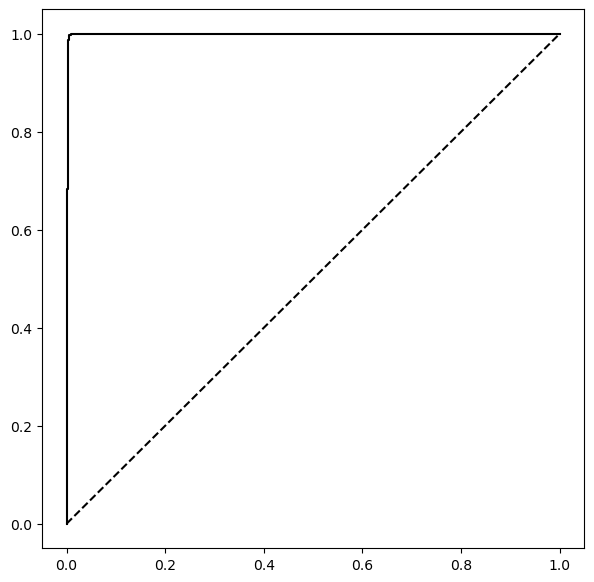

In [455]:
fpr, tpr, ths = roc_curve(y_ts, mlpc.predict_proba(X_ts)[:,1])
plt.figure(figsize=(7,7))
plt.plot(fpr,tpr,'k-')
plt.plot((0,1),(0,1),'k--');

In [456]:
loss = mlpc.best_estimator_.loss_curve_
plt.figure(figsize=(15,5))
plt.plot(loss, 'o-')
plt.xticks(np.arange(19));

In [457]:
start, end = 0, X_val_padronizado.shape[0]
validation = list(y_val[start:end].values)
# print(validation)

In [458]:
prediction = list(mlpc.predict(X_val_padronizado[start:end]))
# print(prediction)

In [459]:
if (validation != prediction): 
    # imprimir dataframe com PREVISÃO diferente da variável real de referência
    resultados = []
    for i, (a, b) in enumerate(zip(validation, prediction)):
        if a != b:
    #         print(f"Posição {i}: {a} != {b}")
            resultados.append([i, a, b])
    dfp = pd.DataFrame(resultados, columns=["seq", "validation", "prediction"])
    print(f'{len(prediction)} registros lidos')
    print('---')
    mlpc_y_val = dfp.prediction.shape[0]
    print(f'{dfp.prediction.shape[0]} tipo(s) de vinho(s) NÃO previstos corretamente!')
    print('---')
    print(dfp.prediction.value_counts())
    print('---')
    display(dfp.tail())
else:    
    print(f'O modelo previu corretamente os resultados em relação a variável "y"')
    print(list(set(validation) - set(prediction)))

585 registros lidos
---
13 tipo(s) de vinho(s) NÃO previstos corretamente!
---
prediction
0    13
Name: count, dtype: int64
---


seq  validation  prediction
8   388           1           0
9   432           1           0
10  439           1           0
11  454           1           0
12  556           1           0

In [460]:
# MATRIZ CONFUSÃO - df Validação
mlpc_y_pred_val = mlpc.predict(X_val_padronizado)
confusion_matrix(y_val, mlpc_y_pred_val)

array([[161,   0],
       [ 13, 411]], dtype=int64)

<a name="rna"></a>
<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            TensorFlow
        </b>
    <br/>&nbsp;    
</center>

In [461]:
# Desativar os avisos
import warnings
warnings.filterwarnings('ignore')

In [462]:
# ESTUDAR ESSE MODELO COM MAIS ATENÇÃO!
# VERIFICAR OS PARAMETROS
# TESTAR A BASE COM O PRÉ-PROESSAMENTO DO KERAS

# Criando o modelo da rede neural
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_tr.shape[1],
    )),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilando o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinando o modelo
model.fit(X_tr, y_tr, epochs=10, batch_size=32, validation_data=(X_ts, y_ts))

Epoch 1/10
170/170 [==============================] - 1s 3ms/step - loss: 0.1020 - accuracy: 0.9765 - val_loss: 0.0321 - val_accuracy: 0.9931
Epoch 2/10
170/170 [==============================] - 0s 2ms/step - loss: 0.0299 - accuracy: 0.9934 - val_loss: 0.0263 - val_accuracy: 0.9940
Epoch 3/10
170/170 [==============================] - 0s 3ms/step - loss: 0.0240 - accuracy: 0.9939 - val_loss: 0.0206 - val_accuracy: 0.9953
Epoch 4/10
170/170 [==============================] - 0s 2ms/step - loss: 0.0197 - accuracy: 0.9949 - val_loss: 0.0185 - val_accuracy: 0.9961
Epoch 5/10
170/170 [==============================] - 0s 2ms/step - loss: 0.0174 - accuracy: 0.9952 - val_loss: 0.0199 - val_accuracy: 0.9949
Epoch 6/10
170/170 [==============================] - 0s 3ms/step - loss: 0.0150 - accuracy: 0.9961 - val_loss: 0.0174 - val_accuracy: 0.9953
Epoch 7/10
170/170 [==============================] - 0s 2ms/step - loss: 0.0130 - accuracy: 0.9963 - val_loss: 0.0175 - val_accuracy: 0.9953
Epoch 

In [463]:
# Avaliar o modelo nos dados de teste
evaluation = model.evaluate(X_ts, y_ts)

# Fazer previsões usando o modelo nos dados de teste
predictions = model.predict(X_ts)
predicted_labels = (predictions > 0.5).astype("int32")  # Se for um modelo de classificação binária

# Calcular métricas
model_precision = precision_score(y_ts, predicted_labels)
model_recall = recall_score(y_ts, predicted_labels)
model_f1_score = f1_score(y_ts, predicted_labels)

# Imprimir métricas
print("Perda (Loss):", evaluation[0])
print("Acurácia (Accuracy):", evaluation[1])
print("Precisão (Precision):", model_precision)
print("Recall:", model_recall)
print("F1-score:", model_f1_score)

73/73 [==============================] - 0s 1ms/step
Perda (Loss): 0.014397136867046356
Acurácia (Accuracy): 0.995710015296936
Precisão (Precision): 0.9939446366782007
Recall: 0.9973958333333334
F1-score: 0.9956672443674177


In [464]:
start, end = 0, X_val_padronizado.shape[0]
validation = list(y_val[start:end].values)
# print(validation)

In [465]:
probabilidades = model.predict(X_val_padronizado[start:end])

# Definindo um limiar
limiar = 0.5

# Convertendo probabilidades em rótulos (0 ou 1) com base no limiar
prediction = [1 if prob >= limiar else 0 for prob in probabilidades]

# print(prediction)

19/19 [==============================] - 0s 1ms/step


In [466]:
if (validation != prediction): 
    # imprimir dataframe com PREVISÃO diferente da variável real de referência
    resultados = []
    for i, (a, b) in enumerate(zip(validation, prediction)):
        if a != b:
    #         print(f"Posição {i}: {a} != {b}")
            resultados.append([i, a, b])
    dfp = pd.DataFrame(resultados, columns=["seq", "validation", "prediction"])
    print(f'{len(prediction)} registros lidos')
    print('---')
    tf_y_val = dfp.prediction.shape[0]
    print(f'{dfp.prediction.shape[0]} tipo(s) de vinho(s) NÃO previstos corretamente!')
    print('---')
    print(dfp.prediction.value_counts())
    print('---')
    display(dfp.tail())
else:    
    print(f'O modelo previu corretamente os resultados em relação a variável "y"')
    print(list(set(validation) - set(prediction)))

585 registros lidos
---
14 tipo(s) de vinho(s) NÃO previstos corretamente!
---
prediction
0    14
Name: count, dtype: int64
---


seq  validation  prediction
9   363           1           0
10  388           1           0
11  432           1           0
12  467           1           0
13  556           1           0

<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            Combinação de Modelos
        </b>
    <br/>&nbsp;
</center>

In [467]:
# QUANDO POSSÍVEL TESTAR E ESTUDAR MELHOR ESSA FUNÇÃO
# Este algorítmo está atralado com a diversidade dos dados para gerar multiplos modelos
# de um mesmo modelo (exemplo: várias versões do KNN) e chegar ao de melhor avaliação final
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html
# Bagging
# from sklearn.ensemble import BaggingClassifier 

In [468]:
validacao = RepeatedKFold(n_splits = 10, n_repeats = 3)
model = [('LogisticRegression', rf), ('KNeighborsClassifier', neigh), ('ExtraTreesClassifier', etc)]
combined_model = VotingClassifier(model, voting = 'hard')
medidas = cross_validate(combined_model, X_tr, y_tr, cv = validacao, scoring = 'accuracy')
round(medidas['test_score'].mean(), 4)

0.9936

In [469]:
combined_model.fit(X_tr, y_tr)

VotingClassifier(estimators=[('LogisticRegression',
                              RandomForestClassifier(max_depth=8,
                                                     n_estimators=1000,
                                                     n_jobs=-1)),
                             ('KNeighborsClassifier',
                              GridSearchCV(cv=10,
                                           estimator=KNeighborsClassifier(),
                                           param_grid={'n_neighbors': array([3, 5, 7, 9])},
                                           scoring='roc_auc')),
                             ('ExtraTreesClassifier',
                              GridSearchCV(cv=10,
                                           estimator=ExtraTreesClassifier(),
                                           param_grid={'max_depth': array([ 5, 10]),
                                                       'n_estimators': array([250, 500]),
                                                       'n_jobs': array([-1])},
                                           scoring='roc_auc'))])

In [470]:
validation[:20]

[1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1]

In [471]:
prediction = list(combined_model.predict(X_val_padronizado[start:end]))
# print(prediction)

In [472]:
prediction[:20]

[1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1]

In [473]:
if (validation != prediction): 
    # imprimir dataframe com PREVISÃO diferente da variável real de referência
    resultados = []
    for i, (a, b) in enumerate(zip(validation, prediction)):
        if a != b:
    #         print(f"Posição {i}: {a} != {b}")
            resultados.append([i, a, b])
    dfp = pd.DataFrame(resultados, columns=["seq", "validation", "prediction"])
    print(f'{len(prediction)} registros lidos')
    print('---')
    print(f'{dfp.prediction.shape[0]} tipo(s) de vinho(s) NÃO previstos corretamente!')
    print('---')
    print(dfp.prediction.value_counts())
    print('---')
    display(dfp.tail())
else:    
    print(f'O modelo previu corretamente os resultados em relação a variável "y"')
    print(list(set(validation) - set(prediction)))

585 registros lidos
---
20 tipo(s) de vinho(s) NÃO previstos corretamente!
---
prediction
0    20
Name: count, dtype: int64
---


seq  validation  prediction
15  388           1           0
16  432           1           0
17  439           1           0
18  454           1           0
19  461           1           0

In [474]:
# MATRIZ CONFUSÃO - df Validação
combined_model_y_pred_val = combined_model.predict(X_val_padronizado)
confusion_matrix(y_val, combined_model_y_pred_val)

array([[161,   0],
       [ 20, 404]], dtype=int64)

<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            Métricas - modelos de classificação
        </b>
    <br/>&nbsp;
</center>

In [475]:
# data frame modelos
dfm = {
    'modelo':['Extra Trees Classifier', 'KNeighbors Classifier', 'Decision Tree Classifier',
              'Logistic Regression', 'Random Forest Classifier', 'Neural Network MLPC', 'TensorFlow'],
    'accuracy':[etc_acuracia,neigh_acuracia,dtc_acuracia,lr_acuracia, rf_acuracia, mlpc_acuracia, evaluation[1]],
    'recall':[etc_recall,neigh_recall,dtc_recall, lr_recall, rf_recall, mlpc_recall, model_recall],
    'precision':[etc_precision,neigh_precision,dtc_precision, lr_precision, rf_precision, mlpc_precision, model_precision],
    'f1_score':[etc_f1_score,neigh_f1_score,dtc_f1_score,lr_f1_score, rf_f1_score, mlpc_f1_score, model_f1_score],
    'ERROS de predição': [etc_y_val, neigh_y_val, dtc_y_val, lr_y_val, rfc_y_val, mlpc_y_val, tf_y_val]
    }    
modelos = pd.DataFrame(dfm)

In [476]:
# Análise de perfomance de cada modelo em relação as métrica da matrix confusão
modelos.style.highlight_max(subset=list(modelos.columns.drop(['modelo','ERROS de predição'])))

In [477]:
# Análise de erros de predição de cada modelo em relação ao dados do mundo real
modelos.style.highlight_min(subset=list(modelos.columns.drop(['modelo', 'accuracy', 'recall', 'precision', 'f1_score'])))